# Intro to Machine learning

When we *do* machine learning, this can also be called:
- data mining
- pattern recognition
- modeling

because we are looking for patterns in the data and typically then planning to
use those patterns to make predictions or automate a task.  

Each of these terms does have slightly different meanings and usage, but
someitmes they're used close to exchangeably.


We're going to appraoch machine learning from the perspective of *modeling* for
a few reasons:
- model based machine learnining streamlines understanding the big picture
- the model way of interpreting it aligns well with using sklearn
- thinking in terms of models aligns with incorporating domain expertise, as in our data science definition


```{admonition} Further Reading
this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/05/Bishop-MBML-2012.pdf) by Christopher M. Bishop, a leading ML researcher who also wrote one of a the widely preferred
graduate level ML textbooks, details advantages of a model based perspective and
a more mathematical version of a model based approach to machine learning.
```

````{margin}
```{hint}
In CSC461: Machine Learning, you can encounter an *algorithm* focused approach
to machine learning, but I think having the model based perspective first helps
you avoid common pitfalls.
```
````

## What is a Model?

A model is a simplified representation of some part of the world. A famous quote about models is:


```{epigraph}
All models are wrong, but some are useful
--[George Box](https://en.wikipedia.org/wiki/All_models_are_wrong)[^wiki]
```

In machine learning, we use models, that are generally _statistical_ models.


> A statistical model is a mathematical model that embodies a set of statistical assumptions concerning the generation of sample data (and similar data from a larger population). A statistical model represents, often in considerably idealized form, the data-generating process
[wikipedia](https://en.wikipedia.org/wiki/Statistical_model#:~:text=A%20statistical%20model%20is%20a,%2C%20the%20data%2Dgenerating%20process.)

```{admonition} Further Reading
read more in the[Model Based Machine Learning Book](http://www.mbmlbook.com/LearningSkills_A_model_is_a_set_of_assumptions.html)

```

## Models in Machine Learning

Starting from a dataset, we first make an additional designation about how we will use the different variables (columns). We will call most of them the _features_, which we denote mathematically with $\mathbf{X}$ and we'll choose one to be the _target_ or _labels_, denoted by $\mathbf{y}$.

The core assumption for just about all machine learning is that there exists some function $f$ so that for the $i$th sample

$$
  y_i = f(\mathbf{x}_i)
$$

## Types of Machine Learning

Then with different additional assumptions we get different types of machine learning:
- if both features ($\mathbf{X}$) and target ($\mathbf{y}$) are observed (contained in our dataset) it's [__supervised learning__](https://en.wikipedia.org/wiki/Supervised_learning) [code](https://scikit-learn.org/stable/supervised_learning.html)
- if only the features ($\mathbf{X}$) are observed, it's [__unsupervised learning__](https://en.wikipedia.org/wiki/Unsupervised_learning) [code](https://scikit-learn.org/stable/unsupervised_learning.html)


## Supervised Learning

we'll focus on supervised learning first.  we can take that same core assumption and use it with additional information about our target variable to determine learning __task__ we are working to do.

$$
  y_i = f(\mathbf{x}_i)
$$

- if $y_i$ are discrete (eg flower species) we are doing __classification__
- if $y_i$ are continuous (eg height) we are doing __regression__


## Machine Learning Pipeline

To do machine learning we start with __training data__ which we put as input to the __learning algorithm__. A learning algorithm might be a generic optimization procedure or a specialized procedure for a specific model. The learning algorithm outputs a trained __model__ or the parameters of the model. When we deploy a model we pair the __fit model__ with a __prediction algorithm__ or __decision__ algorithm to evaluate a new sample in the world.

In experimenting and design, we need __testing data__ to evaluate how well our learning algorithm understood the world.  We need to use previously unseen data, because if we don't we can't tell if the prediction algorithm is using a rule that the learning algorithm produced or just looking up from a lookup table the result.  This can be thought of like the difference between memorization and understanding.

When the model does well on the training data, but not on test data, we say that it does not generalize well.  


## Machine Learning with Scikit Learn

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
sns.set_theme(palette= "colorblind")

In [2]:
type(GaussianNB)

abc.ABCMeta

In [3]:
type(train_test_split)

function

We're trying to build an automatic flower classifier that, for measurements of a new flower returns the predicted species. To do this, we have a DataFrame with columns for species, petal width, petal length, sepal length, and sepal width. The species is what type of flower it is the petal and sepal are parts of the flower.

We'll load the data from Seaborn

In [4]:
iris_df = sns.load_dataset('iris')

First, we'll look at the data.

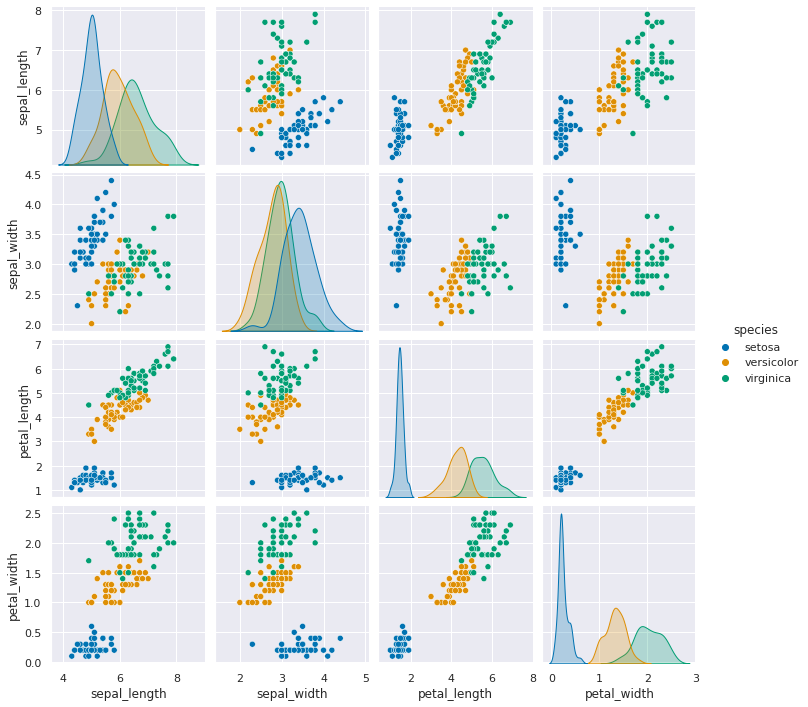

In [5]:
sns.pairplot(data=iris_df, hue='species')

We can see that this data is well suited for classification not only because
in the world it makes sense, that we can use the measurements of flower petals
to differentiate species, but also because the different species do not overlap
too much.  We call this **separable** data.

We'll pick out the target and features from this data frame

In [6]:
target = iris_df['species'].values
type(target)

numpy.ndarray

In [7]:
features = iris_df.values[:,:4]
features.shape

(150, 4)

Next, we use the sklearn function to create train and test data.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target,random_state=0)

```{admonition} Try it Yourself
Try using a different random seed (value for `random_state`) or a different split
size.  Also try splitting by taking the first 80% of the data vs the last 20%.
What happens?
```

We'll check what the split does by looking at the shape.

In [9]:
X_train.shape

(112, 4)

In [10]:
X_test.shape

(38, 4)

Now we instantiate our classifier with the constructor method
````{margin}
```{admonition} Try it Yourself
1. what other constructors have we used?
1. What happens if you skip this step?
1. Can you cascade this step?
````

In [11]:
gnb = GaussianNB()

In [12]:
gnb

GaussianNB()

This created an empty object, we can look at it's contents:

In [13]:
gnb.__dict__

{'priors': None, 'var_smoothing': 1e-09}

We can fit our model, or learn the model parameters, with the `fit` method.  THe
fit method implements the actual learning algorithm.

In [14]:
gnb.fit(X_train, y_train)

GaussianNB()

Once we fit we can see it knows about our dataset now

In [15]:
gnb.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'classes_': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'n_features_in_': 4,
 'epsilon_': 3.2135586734693877e-09,
 'theta_': array([[4.9972973 , 3.38918919, 1.45405405, 0.24054054],
        [5.91764706, 2.75882353, 4.19117647, 1.30882353],
        [6.66341463, 2.9902439 , 5.58292683, 2.03902439]]),
 'var_': array([[0.12242513, 0.14474799, 0.01978087, 0.01159971],
        [0.2649827 , 0.11124568, 0.22139274, 0.0408045 ],
        [0.4071981 , 0.11453897, 0.30483046, 0.06579417]]),
 'class_count_': array([37., 34., 41.]),
 'class_prior_': array([0.33035714, 0.30357143, 0.36607143])}

We can apply our classifier with the predict method, which generates a prediction
based on what it learned from the training data for each sample in the test data.

In [16]:
y_pred = gnb.predict(X_test)

In [17]:
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor'], dtype='<U10')

We'll see better ways to evaluate on Friday, but as a first check, we can check
if it matches

In [18]:
sum(y_pred == y_test)

38

and compare to how many.

In [19]:
len(y_test)

38

## Questions at the End of Class



### Clarifying Questions


#### Does this method work if the dataframe has more than one categorical variable
```{toggle}
We can use categorical variables as features, Gaussian Naive Bayes assumes continuous valued features (in the model) but theere are other classifiers that do not, including
other types of Naive Bayes.

We could also, with a dataset with multiple categorical variables, build different
classifiers, one to predict each categorical variable.  For example, if our iris
data also had a column with 'color' we could try to predict the color from the
measurements.  Since we know that the measurements predict the species, predicting color might only work if the different species come in different colors.
```

#### Were the train and test variables randomly generated from the library based off of the dataset we used?
````{toggle}
The test and train variables were created by randomly subsetting the data that
we had.  For example, we could think of this as randomly permuting the samples
and then choosing the first 75% as training and the rest as test, or we could
think of it like creating randomly choosing 38 (.25*150, since there are 150
  samples) numbers between 0 and 149 and masking and filtering.

```{admonition} Ram Token Opportunity
Submit code that uses numpy to illustrate one or both of these ways to create
test train splits.
```

<!-- ```{code-cell} ipython3
import numpy.random as rnd


``` -->
````

#### Is this method we learned today using linear regresssion?
```{toggle}
No, we'll talk more about the model it does use on Friday and we'll cover linear regression in a couple of weeks.
```

### Foreshadowing Questions



#### If we were to use a larger sample size for the test, would this improve results?
```{toggle}

If we use more for the test set, we'd have less for training, so, in general,
that would decrease performance.  In this particular dataset, we can probably
still do well with a small training set because the classes are separable.  

Using more data for the test set, does mean we get a better estimate of the
true test performance, however.  We'll explore these type of tradeoffs over the
rest of the course.
```


#### How robust/used is this specific machine learning algorithm? Ie are there more powerful open source ones we can play with
```{toggle}
This specific model is not very robust, but it's a good starter.  We will see
more complex models wich are also more robust in the future.  There are many
open source models that you can use.  Most of the learning algorithms are,
what's secret is typically the training data and some of the specific parameters
provided to the learning algorithm.  Scikit learn (`sklearn`) provides many.
Other popular ones, for deep learning are tensorflow and keras.
```


### Logistical Questions

#### Will we be scraping data from sites and try to implement machine learning?
```{toggle}
Not in class, for the sake of time, but this would be a great portfolio exercise.  

If you don't earn construct level 2 in assignment 5, you can also earn it on assignment 7 by doing this.
```

#### will sklearn be used in assignments
```{toggle}
yes. we'll be using sklearn for the rest of the semester.
```

### Context Questions

#### When did Google change to machine learning for their search queries?
```{toggle}
The original page rank algorithm, focused
mostly on ranking the pages by treating the internet like a graph. The major
updates in around 2002-2003 changed how things worked a lot and started valuing
other things. Valuing other things relies on the search history.  For sure by
2010 when they added the text completion recommendations they were relying on
previous queries at least equally, if not more than the graph structure of the
Internet.

```

## More Practice

See the try it yourself boxes above